In [2]:
import statistics as s
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.polynomial.polynomial import polyfit
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, SelectFromModel, RFE, RFECV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.metrics import mean_squared_error, mean_squared_log_error, max_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, KFold, validation_curve, GridSearchCV, cross_val_predict
from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.metrics import MeanSquaredError
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from math import sqrt, log, log10
from scipy.stats import shapiro
%matplotlib inline 
plt.rcParams['figure.figsize'] = (12, 8)

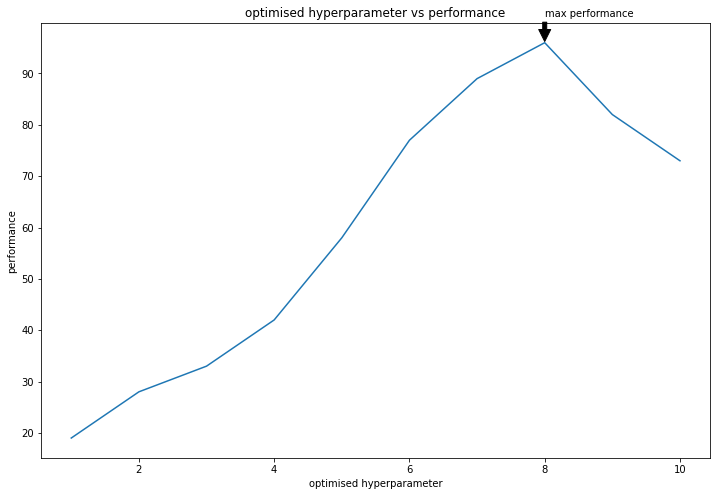

In [ ]:
opt=np.linspace(1,10,10)
per=[19,28,33,42,58,77,89,96,82,73]
ymax = max(per)
xpos = per.index(ymax)
xmax = opt[xpos]
fig = plt.figure()
ax = fig.add_subplot(111)
line, = ax.plot(opt,per)
ax.annotate('max performance', xy=(xmax, ymax), xytext=(xmax, ymax+5),arrowprops=dict(facecolor='black', shrink=0.05),)
plt.title("optimised hyperparameter vs performance")
plt.xlabel("optimised hyperparameter")
plt.ylabel("performance")
plt.show()

In [7]:
DBCT_PT=pd.read_csv("smooth_msc.csv",decimal = ',',sep=";")
l=DBCT_PT.shape[0]
c=DBCT_PT.shape[1]
Y=DBCT_PT["ylg"]
X=DBCT_PT.drop("ylg",axis=1)

In [8]:
DBCT_PT

,ylg,X350,X351,X352,X353,X354,X355,X356,X357,X358,...,X2491,X2492,X2493,X2494,X2495,X2496,X2497,X2498,X2499,X2500
0,1.65985725812768,0.83463511308915,0.840735830662786,0.850148789997877,0.866102939679293,0.885868414864994,0.90153046030785,0.917467763029366,0.934397664402203,0.94741663836503,...,0.573008604848643,0.57350441875533,0.57441726599073,0.57462454213993,0.574474682515574,0.574741938246747,0.574701556332194,0.574152794676726,0.57357713384344,0.573113463212608
1,1.63256592581458,0.821512467339286,0.84719214353806,0.864672555893465,0.870645414496579,0.899252920941284,0.902377858148379,0.884515758859317,0.869543062522787,0.890544512492467,...,0.466700805639403,0.466967523507743,0.467395988740729,0.467458392431366,0.467124404010148,0.467060878599882,0.46667987390973,0.466765453728853,0.467811669824341,0.468479819386651
2,1.68023886397876,0.671131587448895,0.683446355414137,0.688772997465665,0.692741454423685,0.700213672657473,0.713045547027012,0.724020396425786,0.731057730937109,0.740739944257665,...,0.510563282495217,0.510658809231386,0.510906854302622,0.511571601176507,0.512198567471425,0.512603661680916,0.513026016627486,0.513061345323629,0.51314221687989,0.513682168098063
3,1.65710246421556,0.857225361854228,0.872588080895279,0.884562360724383,0.891260238936374,0.896409421178331,0.899948723415052,0.909855233911104,0.92492814471975,0.93161326776611,...,0.559079954750582,0.559720055244982,0.559700323652069,0.560186699073417,0.560915602811961,0.561147461212327,0.561145528074454,0.560816051380314,0.560048319482136,0.559590549775535
4,1.65645093258516,0.762260093191554,0.793864380386823,0.791598510005496,0.767871170801341,0.786794137083116,0.795239878961421,0.810011478767236,0.82958346623502,0.815024982129023,...,0.447094475402644,0.447506743914267,0.447929694268712,0.448402974530126,0.448541958035284,0.448363088303007,0.448540392697471,0.44884752766716,0.448983237598909,0.448996516819092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,1.63948465018694,0.792339152044768,0.806939029472306,0.816794431278902,0.822254056400058,0.830468301571894,0.834469385367688,0.839995897721404,0.851219966608894,0.868947037458639,...,0.508738134600331,0.509671274694673,0.510204360640909,0.510183619462372,0.509977558743503,0.509940357211272,0.510136492626377,0.510320938379133,0.510996639464779,0.5106220216611
346,1.66491442828925,0.874214054877714,0.899270491864286,0.906773392037062,0.902693097983666,0.924093643797923,0.918941290740323,0.920945326079841,0.940265242705462,0.945003979294077,...,0.401642946404506,0.401688111022208,0.401945213518166,0.402295133789084,0.402385710599457,0.402387827319778,0.402348514058854,0.402307158989593,0.402228842164849,0.401938719014601
347,1.66598230713016,0.788353623984514,0.800338644906083,0.806119565912231,0.807112443596173,0.82008598315272,0.824985065001135,0.839945949278461,0.862690621353695,0.856008399228709,...,0.532960998708688,0.533521397840595,0.534237587048199,0.534431885946913,0.534747648552505,0.534949964244647,0.535115343213153,0.535381542569341,0.535242559443785,0.534921262520614
348,1.71299906098714,0.831095842009258,0.853130149666707,0.865993725705828,0.868780752955631,0.879717794634945,0.883975863743404,0.893572574928304,0.90939453256724,0.913983419304589,...,0.542245497373093,0.542312499420136,0.542648676480833,0.543588667429891,0.544056185553083,0.543815166124439,0.543736698187136,0.543818501910574,0.543494263282929,0.543633214544836


In [13]:
a=DBCT_PT.columns[325:433]
b=DBCT_PT.columns[865:1831]
c=DBCT_PT.columns[2045:2152]
selected=[]
for item in a:
    selected.append(item)
for item in b:
    selected.append(item)
for item in c:
    selected.append(item)

In [14]:
DBCT_PT[selected].to_excel("SMOOTH_MSC.xlsx")

In [3]:
testR2=[]
testRMSE=[]
trainR2=[]
trainRMSE=[]
CVR2=[]
CVRMSE=[]
aic=[]
bic=[]
rpd=[]

In [4]:
def R2(model,x,y,methode):
  pr=pd.Series(model.predict(x))
  err=pr-y
  pr.index=range(len(pr))
  y.index=range(len(y))
  ssr=[]
  sse=[]
  sst=[]
  for i in pr:
    ssr.append((i-s.mean(y))**2)
  for j in y:
    sst.append((j-s.mean(y))**2)
  for k,l in zip(y,pr):
    sse.append((k-l)**2)
  if(methode=="model"):
    return sum(ssr)/sum(sst)
  elif(methode=="residual"):
    return 1-(sum(sse)/sum(sst))
def MSE(y,ypr):
  ss=[]
  for i,j in zip(y,ypr):
    ss.append((i-j)**2)
  return ((1/len(y))*sum(ss))[0]
def AIC(model,y,ypr,n):
    cal_aic = len(y) * log(MSE(y,ypr)) + 2 * (n + 1)
    return cal_aic
def BIC(model,y,ypr,n):
  cal_bic = len(y) * log(MSE(y,ypr)) + (n + 1) * log(len(y))
  return cal_bic
def adj_r2(model,x,y):
  r2=model.score(x,y)
  n=x.shape[0]
  p=x.shape[1]
  return 1-((1-r2)*(n-1)/(n-p-1))
def RPD(x,y,model):
  return x.std().mean()/sqrt(mean_squared_error(y,model.predict(x)))

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state = 0)

In [6]:
pls=PLSRegression(n_components=29)
pls.fit(x_train, y_train)
"""
print("Test : ")
print("AIC : ",AIC(pls,y_test,pls.predict(x_test)))
print("BIC : ",BIC(pls,y_test,pls.predict(x_test)))
print("R-squared:", pls.score(x_test,y_test)*100, "%")
print("RMSE:", sqrt(mean_squared_error(y_test, pls.predict(x_test))))
print("Max-E:", max_error(y_test, pls.predict(x_test)))
print("Train : ")
print("AIC : ",AIC(pls,y_train,pls.predict(x_train)))
print("BIC : ",BIC(pls,y_train,pls.predict(x_train)))
print("R-squared : ", pls.score(x_train,y_train)*100, "%")
print("RMSE:", sqrt(mean_squared_error(y_train, pls.predict(x_train))))
print("Max-E:", max_error(y_train, pls.predict(x_train)))
print("CV : ")
cv_RMSE_scores=cross_val_score(PLSRegression(n_components=24), x_train, y_train, scoring='neg_root_mean_squared_error', cv=5)
print("RMSE : ",abs(np.mean(cv_RMSE_scores)))
cv_Rsquared_scores=cross_val_score(PLSRegression(n_components=24), x_train, y_train, scoring='r2', cv=5)
print("R-squared : ",np.mean(cv_Rsquared_scores)*100,"%")
"""
testR2.append(pls.score(x_test,y_test)*100)
testRMSE.append(sqrt(mean_squared_error(y_test, pls.predict(x_test))))
trainR2.append(pls.score(x_train,y_train)*100)
trainRMSE.append(sqrt(mean_squared_error(y_train, pls.predict(x_train))))
CVR2.append(np.mean(cross_val_score(PLSRegression(n_components=24), x_train, y_train, scoring='neg_root_mean_squared_error', cv=5)))
CVRMSE.append(np.mean(cross_val_score(PLSRegression(n_components=24), x_train, y_train, scoring='neg_root_mean_squared_error', cv=5)))
#aic.append(AIC(pls,y_test,pls.predict(x_test),29))
#bic.append(BIC(pls,y_test,pls.predict(x_test),29))
rpd.append(RPD(x_test,y_test,pls))
#"""

In [7]:
pcr=make_pipeline(StandardScaler(), PCA(n_components=29), LinearRegression())
pcr.fit(x_train, y_train)
"""
print("Test : ")
#print("AIC : ",AIC(pcr,y_test,pcr.predict(x_test)))
#print("BIC : ",BIC(pcr,y_test,pcr.predict(x_test)))
print("R-squared:", pcr.score(x_test,y_test)*100, "%")
print("RMSE:", sqrt(mean_squared_error(y_test, pcr.predict(x_test))))
print("Max-E:", max_error(y_test, pcr.predict(x_test)))
print("Train : ")
#print("AIC : ",AIC(pcr,y_train,pcr.predict(x_train)))
#print("BIC : ",BIC(pcr,y_train,pcr.predict(x_train)))
print("R-squared:", pcr.score(x_train,y_train)*100, "%")
print("RMSE:", sqrt(mean_squared_error(y_train, pcr.predict(x_train))))
print("Max-E:", max_error(y_train, pcr.predict(x_train)))
print("CV : ")
cv_RMSE_scores=cross_val_score(make_pipeline(StandardScaler(), PCA(n_components=29), LinearRegression()), x_train, y_train, scoring='neg_root_mean_squared_error', cv=5)
print("RMSE : ",abs(np.mean(cv_RMSE_scores)))
cv_Rsquared_scores=cross_val_score(make_pipeline(StandardScaler(), PCA(n_components=29), LinearRegression()), x_train, y_train, scoring='r2', cv=5)
print("R-squared : ",np.mean(cv_Rsquared_scores)*100,"%")
"""
testR2.append(pcr.score(x_test,y_test)*100)
testRMSE.append(sqrt(mean_squared_error(y_test, pcr.predict(x_test))))
trainR2.append(pcr.score(x_train,y_train)*100)
trainRMSE.append(sqrt(mean_squared_error(y_train, pcr.predict(x_train))))
CVR2.append(100*np.mean(cross_val_score(make_pipeline(StandardScaler(), PCA(n_components=29), LinearRegression()), x_train, y_train, scoring='r2', cv=5)))
CVRMSE.append(abs(np.mean(cross_val_score(make_pipeline(StandardScaler(), PCA(n_components=29), LinearRegression()), x_train, y_train, scoring='neg_root_mean_squared_error', cv=5))))
#aic.append(AIC(pcr,y_test,pcr.predict(x_test),29))
#bic.append(BIC(pcr,y_test,pcr.predict(x_test),29))
rpd.append(RPD(x_test,y_test,pcr))
#"""

In [8]:
svr = svm.SVR(kernel='poly', degree=8, gamma='scale', coef0=1.5, tol=0.005, C=1.0, epsilon=0.0001)
svr.fit(x_train,y_train)
"""
print("Test : ")
print("R-squared:", svr.score(x_test,y_test)*100, "%")
print("RMSE:", sqrt(mean_squared_error(y_test, svr.predict(x_test))))
print("Max-E:", max_error(y_test, svr.predict(x_test)))
print("Train : ")
print("R-squared:", svr.score(x_train,y_train)*100, "%")
print("RMSE:", sqrt(mean_squared_error(y_train, svr.predict(x_train))))
print("Max-E:", max_error(y_train, svr.predict(x_train)))
print("CV : ")
cv_RMSE_scores=cross_val_score(svm.SVR(kernel='poly', degree=8, gamma='scale', coef0=1.5, tol=0.005, C=1.0, epsilon=0.0001), x_train, y_train, scoring='neg_root_mean_squared_error', cv=5)
print("RMSE : ",abs(np.mean(cv_RMSE_scores)))
cv_Rsquared_scores=cross_val_score(svm.SVR(kernel='poly', degree=8, gamma='scale', coef0=1.5, tol=0.005, C=1.0, epsilon=0.0001), x_train, y_train, scoring='r2', cv=5)
print("R-squared : ",np.mean(cv_Rsquared_scores)*100,"%")
"""
testR2.append(svr.score(x_test,y_test)*100)
testRMSE.append(sqrt(mean_squared_error(y_test, svr.predict(x_test))))
trainR2.append(svr.score(x_train,y_train)*100)
trainRMSE.append(sqrt(mean_squared_error(y_train, svr.predict(x_train))))
CVR2.append(100*np.mean(cross_val_score(svm.SVR(kernel='linear', degree=8, gamma='scale', coef0=1.5, tol=0.005, C=1.0, epsilon=0.0001), x_train, y_train, scoring='r2', cv=5)))
CVRMSE.append(abs(np.mean(cross_val_score(svm.SVR(kernel='linear', degree=8, gamma='scale', coef0=1.5, tol=0.005, C=1.0, epsilon=0.0001), x_train, y_train, scoring='neg_root_mean_squared_error', cv=5))))
#aic.append(AIC(svr,y_test,svr.predict(x_test),8))
#bic.append(BIC(svr,y_test,svr.predict(x_test),8))
rpd.append(RPD(x_test,y_test,pcr))
#"""

In [9]:
rf=RandomForestRegressor(n_estimators=900, random_state=0, criterion='mse',min_samples_split=2, min_samples_leaf=1,n_jobs=8)
rf.fit(x_train,y_train)
"""
print("Test : ")
print("R-squared:", rf.score(x_test,y_test)*100, "%")
print("RMSE:", sqrt(mean_squared_error(y_test, rf.predict(x_test))))
print("Max-E:", max_error(y_test, rf.predict(x_test)))
print("Train : ")
print("R-squared:", rf.score(x_train,y_train)*100, "%")
print("RMSE:", sqrt(mean_squared_error(y_train, rf.predict(x_train))))
print("Max-E:", max_error(y_train, rf.predict(x_train)))
print("CV : ")
cv_RMSE_scores=cross_val_score(RandomForestRegressor(n_estimators=900, random_state=0, criterion='mse',min_samples_split=2, min_samples_leaf=1), x_train, y_train, scoring='neg_root_mean_squared_error', cv=5)
print("RMSE : ",abs(np.mean(cv_RMSE_scores)))
cv_Rsquared_scores=cross_val_score(RandomForestRegressor(n_estimators=900, random_state=0, criterion='mse',min_samples_split=2, min_samples_leaf=1), x_train, y_train, scoring='r2', cv=5)
print("R-squared : ",np.mean(cv_Rsquared_scores)*100,"%")
"""
testR2.append(rf.score(x_test,y_test)*100)
testRMSE.append(sqrt(mean_squared_error(y_test, rf.predict(x_test))))
trainR2.append(rf.score(x_train,y_train)*100)
trainRMSE.append(sqrt(mean_squared_error(y_train, rf.predict(x_train))))
CVR2.append(100*np.mean(cross_val_score(RandomForestRegressor(n_estimators=900, random_state=0, criterion='mse',min_samples_split=2, min_samples_leaf=1,n_jobs=8), x_train, y_train, scoring='r2', cv=5)))
CVRMSE.append(abs(np.mean(cross_val_score(RandomForestRegressor(n_estimators=900, random_state=0, criterion='mse',min_samples_split=2, min_samples_leaf=1,n_jobs=8), x_train, y_train, scoring='neg_root_mean_squared_error', cv=5))))
#aic.append(AIC(rf,y_test,rf.predict(x_test),1))
#bic.append(BIC(rf,y_test,rf.predict(x_test),1))
rpd.append(RPD(x_test,y_test,rf))
#"""

In [10]:
dt=DecisionTreeRegressor(random_state=0,max_leaf_nodes=11)
dt.fit(x_train,y_train)
"""
print("Test : ")
print("R-squared:", dt.score(x_test,y_test)*100, "%")
print("RMSE:", sqrt(mean_squared_error(y_test, dt.predict(x_test))))
print("Max-E:", max_error(y_test, dt.predict(x_test)))
print("Train : ")
print("R-squared:", rf.score(x_train,y_train)*100, "%")
print("RMSE:", sqrt(mean_squared_error(y_train, dt.predict(x_train))))
print("Max-E:", max_error(y_train, dt.predict(x_train)))
print("CV : ")
cv_RMSE_scores=cross_val_score(DecisionTreeRegressor(random_state=0,max_leaf_nodes=11), x_train, y_train, scoring='neg_root_mean_squared_error', cv=5)
print("RMSE : ",abs(np.mean(cv_RMSE_scores)))
cv_Rsquared_scores=cross_val_score(DecisionTreeRegressor(random_state=0,max_leaf_nodes=11), x_train, y_train, scoring='r2', cv=5)
print("R-squared : ",np.mean(cv_Rsquared_scores)*100,"%")
"""
testR2.append(dt.score(x_test,y_test)*100)
testRMSE.append(sqrt(mean_squared_error(y_test, dt.predict(x_test))))
trainR2.append(dt.score(x_train,y_train)*100)
trainRMSE.append(sqrt(mean_squared_error(y_train, dt.predict(x_train))))
CVR2.append(100*np.mean(cross_val_score(DecisionTreeRegressor(random_state=0,max_leaf_nodes=11), x_train, y_train, scoring='r2', cv=5)))
CVRMSE.append(abs(np.mean(cross_val_score(DecisionTreeRegressor(random_state=0,max_leaf_nodes=11), x_train, y_train, scoring='neg_root_mean_squared_error', cv=5))))
#aic.append(AIC(dt,y_test,dt.predict(x_test),11))
#bic.append(BIC(dt,y_test,dt.predict(x_test),11))
rpd.append(RPD(x_test,y_test,dt))
#"""

In [11]:
knn=KNeighborsRegressor(n_neighbors=3, weights='distance', algorithm='auto', leaf_size=3, p=2, metric='chebyshev')
knn.fit(x_train,y_train)
"""
print("Test : ")
print("R-squared:", knn.score(x_test,y_test)*100, "%")
print("RMSE:", sqrt(mean_squared_error(y_test, knn.predict(x_test))))
print("Max-E:", max_error(y_test, knn.predict(x_test)))
print("Train : ")
print("R-squared:", knn.score(x_train,y_train)*100, "%")
print("RMSE:", sqrt(mean_squared_error(y_train, knn.predict(x_train))))
print("Max-E:", max_error(y_train, knn.predict(x_train)))
print("CV : ")
cv_RMSE_scores=cross_val_score(KNeighborsRegressor(n_neighbors=3, weights='distance', algorithm='auto', leaf_size=3, p=2, metric='chebyshev'), x_train, y_train, scoring='neg_root_mean_squared_error', cv=5)
print("RMSE : ",abs(np.mean(cv_RMSE_scores)))
cv_Rsquared_scores=cross_val_score(KNeighborsRegressor(n_neighbors=3, weights='distance', algorithm='auto', leaf_size=3, p=2, metric='chebyshev'), x_train, y_train, scoring='r2', cv=5)
print("R-squared : ",np.mean(cv_Rsquared_scores)*100,"%")
"""
testR2.append(knn.score(x_test,y_test)*100)
testRMSE.append(sqrt(mean_squared_error(y_test, knn.predict(x_test))))
trainR2.append(knn.score(x_train,y_train)*100)
trainRMSE.append(sqrt(mean_squared_error(y_train, knn.predict(x_train))))
CVR2.append(100*np.mean(cross_val_score(KNeighborsRegressor(n_neighbors=3, weights='distance', algorithm='auto', leaf_size=3, p=2, metric='chebyshev'), x_train, y_train, scoring='r2', cv=5)))
CVRMSE.append(abs(np.mean(cross_val_score(KNeighborsRegressor(n_neighbors=3, weights='distance', algorithm='auto', leaf_size=3, p=2, metric='chebyshev'), x_train, y_train, scoring='neg_root_mean_squared_error', cv=5))))
#aic.append(AIC(knn,y_test,pls.predict(x_test),3))
#bic.append(BIC(knn,y_test,pls.predict(x_test),3))
rpd.append(RPD(x_test,y_test,knn))
#"""

In [12]:
nnm = MLPRegressor(random_state=0,activation = "identity",solver='lbfgs')
nnm.fit(x_train, y_train)
"""
print("Test : ")
print("R-squared:", nnm.score(x_test,y_test)*100, "%")
print("RMSE:", sqrt(mean_squared_error(y_test, nnm.predict(x_test))))
print("Max-E:", max_error(y_test, nnm.predict(x_test)))
print("Train : ")
print("R-squared:", nnm.score(x_train,y_train)*100, "%")
print("RMSE:", sqrt(mean_squared_error(y_train, nnm.predict(x_train))))
print("Max-E:", max_error(y_train, nnm.predict(x_train)))
print("CV : ")
cv_RMSE_scores=cross_val_score(MLPRegressor(random_state=0,activation = "tanh",solver='lbfgs'), x_train, y_train, scoring='neg_root_mean_squared_error', cv=5)
print("RMSE : ",abs(np.mean(cv_RMSE_scores)))
cv_Rsquared_scores=cross_val_score(MLPRegressor(random_state=0,activation = "tanh",solver='lbfgs'), x_train, y_train, scoring='r2', cv=5)
print("R-squared : ",np.mean(cv_Rsquared_scores)*100,"%")
"""
testR2.append(nnm.score(x_test,y_test)*100)
testRMSE.append(sqrt(mean_squared_error(y_test, nnm.predict(x_test))))
trainR2.append(nnm.score(x_train,y_train)*100)
trainRMSE.append(sqrt(mean_squared_error(y_train, nnm.predict(x_train))))
CVR2.append(100*np.mean(cross_val_score(MLPRegressor(random_state=0,activation = "identity",solver='lbfgs'), x_train, y_train, scoring='r2', cv=5)))
CVRMSE.append(abs(np.mean(cross_val_score(MLPRegressor(random_state=0,activation = "identity",solver='lbfgs'), x_train, y_train, scoring='neg_root_mean_squared_error', cv=5))))
#aic.append(AIC(nnm,y_test,nnm.predict(x_test),1))
#bic.append(BIC(nnm,y_test,nnm.predict(x_test),1))
rpd.append(RPD(x_test,y_test,nnm))
#"""

C:\Users\ayoub\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ayoub\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ayoub\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

In [ ]:
print("Best model using RPD is : ",["PLS","PCR","SVR","RFT","DT","KNN","MLP"][rpd.index(max(rpd))])

Best model using RPD is :  MLP


In [ ]:
results=pd.DataFrame([trainR2,CVR2,testR2,trainRMSE,CVRMSE,testRMSE],columns=["pls","pcr","svr","rf","dt","knn","nnm"],index=["trainR2","CVR2","testR2","trainRMSE","CVRMSE","testRMSE"])
results.T.to_excel("results.xlsx")

In [ ]:
models=[pls,pcr,svr,rf,dt,knn,nnm]
W=[]
P=[]
D=[]
for i in models:
    pr=i.predict(x_test).reshape(len(y_test),1)
    err=[]
    for j,k in zip(y_test,pr):
        err.append(j-k)
    w,p = shapiro(err)
    W.append(w)
    P.append(p)
    if p>0.05:
        D.append("Normal")
    elif p<0.05:
        D.append("Not Normal")
comparaison=pd.DataFrame([W,P,D],columns=["pls","pcr","svr","rf","dt","knn","nnm"],index=["Shapiro quantile","Propability","Decision"])
comparaison.T.to_excel("comparaison.xlsx")

In [ ]:
results.T

,trainR2,CVR2,testR2,trainRMSE,CVRMSE,testRMSE
pls,95.255176,-0.349149,89.040748,0.247518,-0.349149,0.321502
pcr,89.920110,85.634467,88.854573,0.360765,0.417467,0.324222
svr,99.395997,81.581002,21.587756,0.088311,0.477542,0.859975
rf,93.470120,48.436259,45.723492,0.290368,0.803206,0.715484
dt,61.125821,17.669732,10.244390,0.708479,1.005946,0.920078
knn,100.000000,47.673206,43.879199,0.000000,0.804569,0.727538
nnm,89.686452,85.845073,89.179329,0.364922,0.412262,0.319463


In [ ]:
comparaison.T

,Shapiro quantile,Propability,Decision
pls,0.883327,4.93854e-07,Not Normal
pcr,0.951888,0.00166455,Not Normal
svr,0.679669,5.12986e-13,Not Normal
rf,0.876516,2.59021e-07,Not Normal
dt,0.937626,0.000224413,Not Normal
knn,0.914612,1.31165e-05,Not Normal
nnm,0.939834,0.000301908,Not Normal


PLS


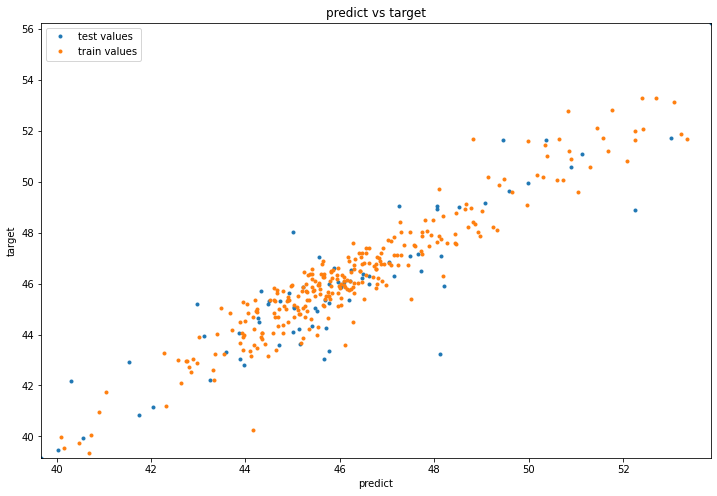

PCR


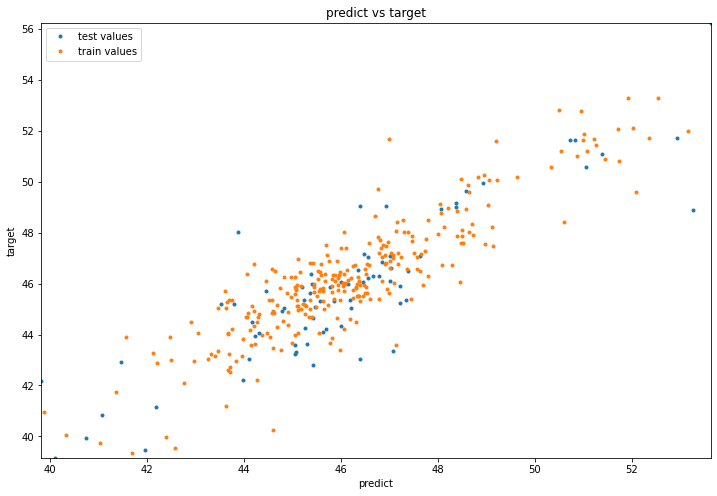

SVR


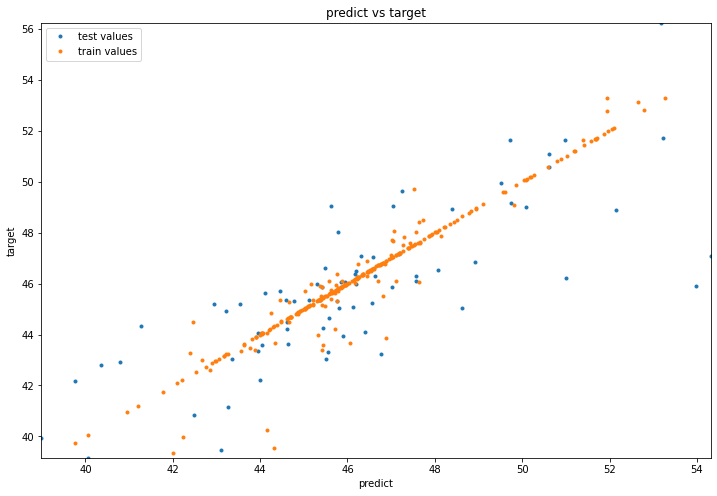

RFT


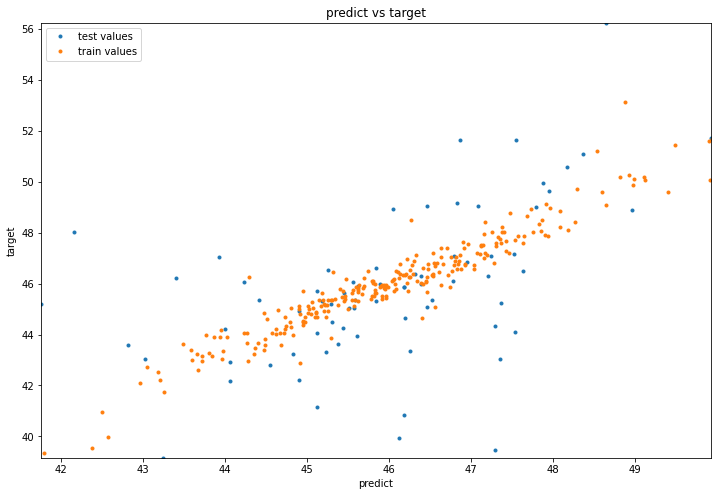

DT


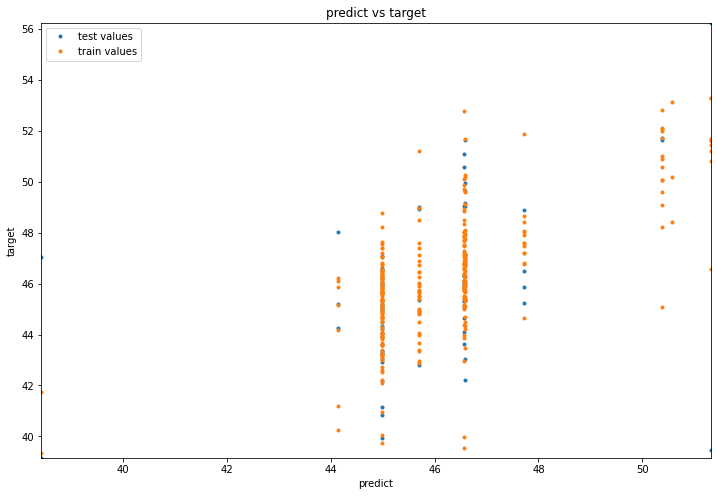

KNN


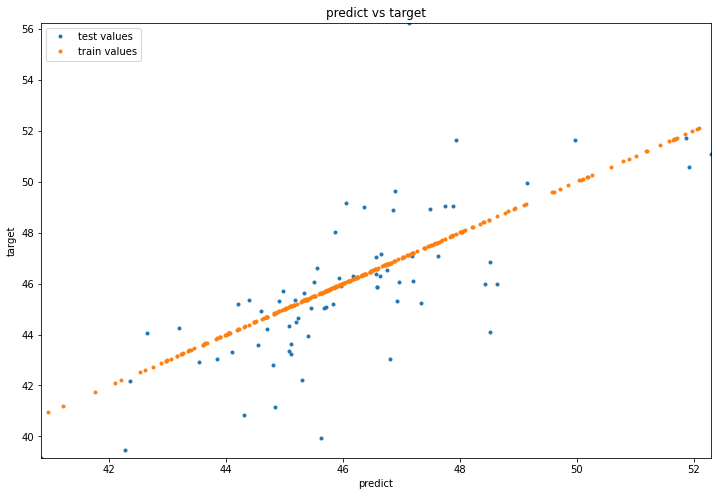

MLP


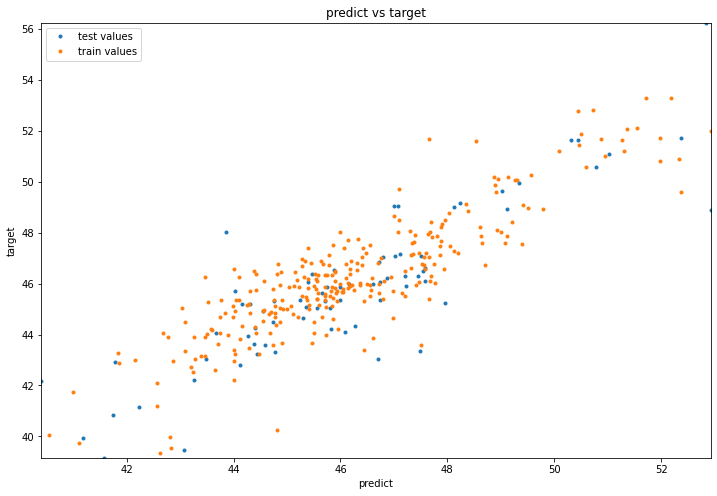

In [14]:
models=[pls,pcr,svr,rf,dt,knn,nnm]
modelsnames=["PLS","PCR","SVR","RFT","DT","KNN","MLP"]
for model,name in zip(models,modelsnames):
  prtest=model.predict(x_test).reshape(len(y_test),1)
  prtest=[i[0] for i in prtest]
  prtrain=model.predict(x_train).reshape(len(y_train),1)
  prtrain=[i[0] for i in prtrain]
  #A, B = np.polyfit(prtest, y_test, 1)
  #C, D = np.polyfit(prtrain, y_train, 1)
  #drt_train=[A+(j*B) for j in prtrain]
  #drt_test=[A+(j*B) for j in prtest]
  pd.DataFrame([prtrain,y_train,prtest,y_test],index=["prtrain","y_train","prtest","y_test"]).T.to_excel("prdata_%s.xlsx"%name)
  print(name)
  plt.plot(prtest,y_test,'.',label="test values")
  #plt.plot(prtest, drt_test, '-',label="test fit line")
  plt.plot(prtrain,y_train,'.',label="train values")
  #plt.plot(prtrain, drt_train, '-',label="train fit line")
  plt.legend(loc="upper left")
  plt.title("predict vs target")
  plt.xlim(min(prtest),max(prtest))
  plt.ylim(min(y_test),max(y_test))
  plt.xlabel("predict")
  plt.ylabel("target")
  plt.show()

PLS


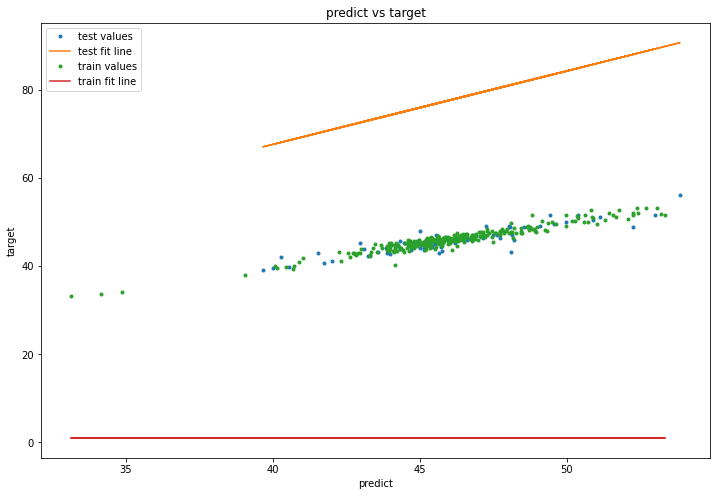

PCR


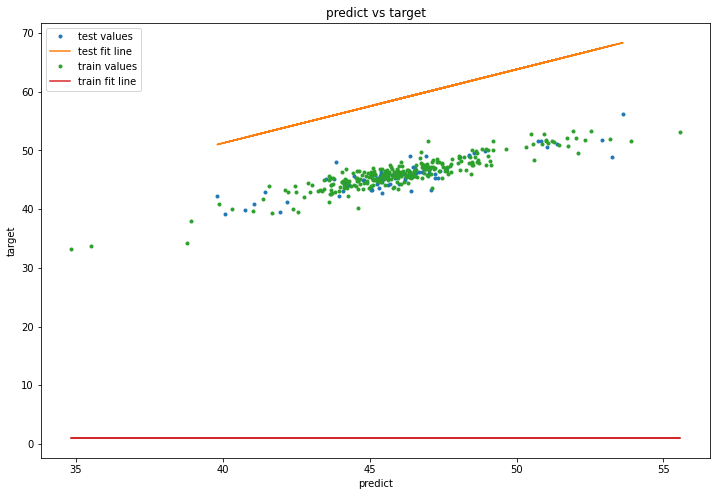

SVR


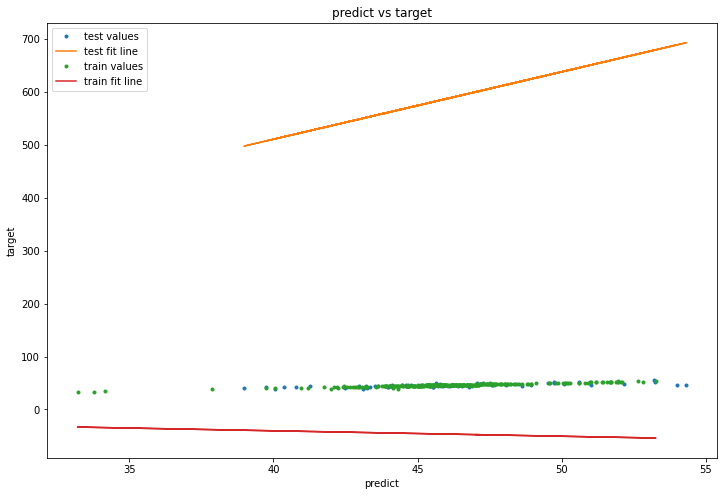

RFT


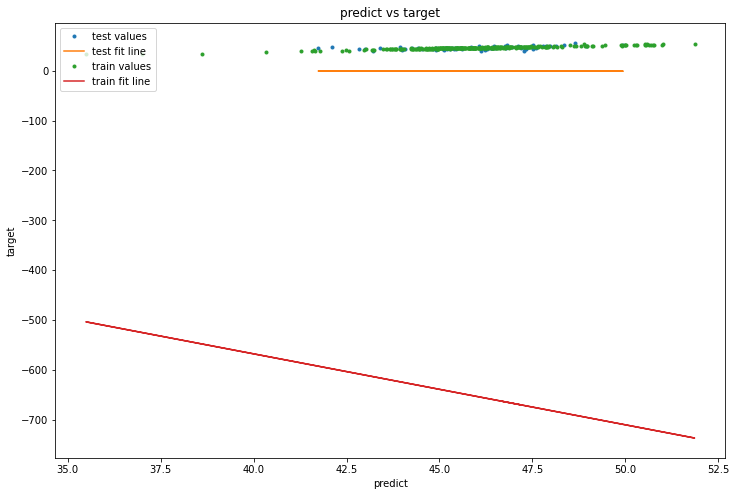

DT


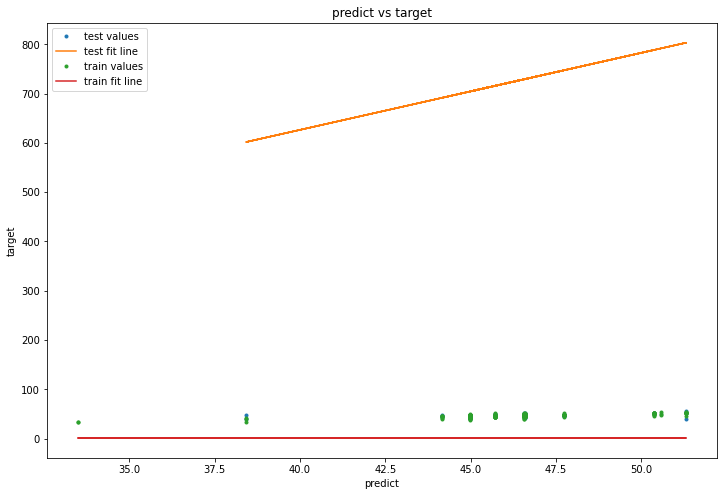

KNN


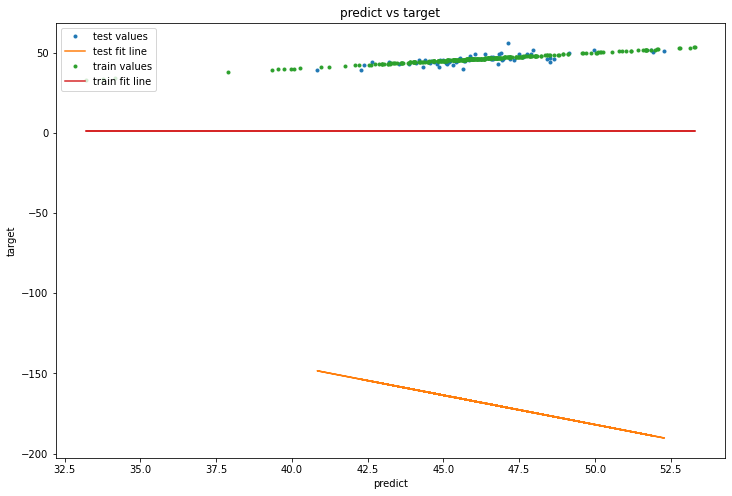

MLP


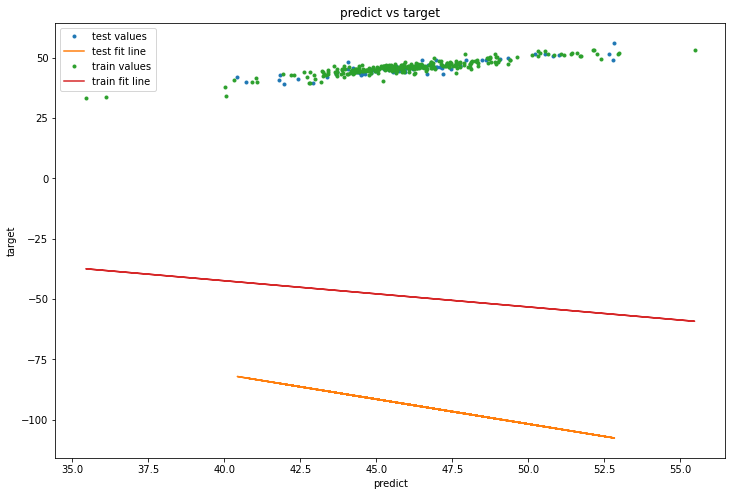

In [ ]:
models=[pls,pcr,svr,rf,dt,knn,nnm]
modelsnames=["PLS","PCR","SVR","RFT","DT","KNN","MLP"]
for model,name in zip(models,modelsnames):
  prtest=model.predict(x_test).reshape(len(y_test),1)
  prtest=[i[0] for i in prtest]
  prtrain=model.predict(x_train).reshape(len(y_train),1)
  prtrain=[i[0] for i in prtrain]
  drt_test = sm.OLS(y_test,sm.add_constant(prtest)).fit()
  drt_train = sm.OLS(y_train,sm.add_constant(prtrain)).fit()
  val_train=[drt_train.params[1]+(j*drt_train.params[0]) for j in prtrain]
  val_test=[drt_test.params[1]+(j*drt_test.params[0]) for j in prtest]
  print(name)
  plt.plot(prtest,y_test,'.',label="test values")
  plt.plot(prtest, val_test, '-',label="test fit line")
  plt.plot(prtrain,y_train,'.',label="train values")
  plt.plot(prtrain, val_train, '-',label="train fit line")
  plt.legend(loc="upper left")
  plt.title("predict vs target")
  plt.xlabel("predict")
  plt.ylabel("target")
  plt.show()

C:\Users\ayoub\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ayoub\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


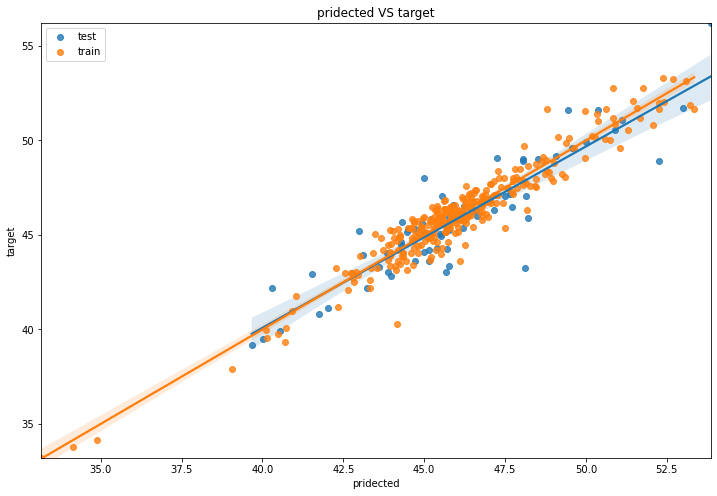

In [24]:
prtest=pls.predict(x_test).reshape(len(y_test),1)
prtest=[i[0] for i in prtest]
prtrain=pls.predict(x_train).reshape(len(y_train),1)
prtrain=[i[0] for i in prtrain]
sns.regplot(prtest,y_test,label="test")
sns.regplot(prtrain,y_train,label="train")
plt.legend(loc="upper left")
plt.xlabel("pridected")
plt.ylabel("target")
plt.xlim(min(min(prtrain),min(prtest)),max(max(prtrain),max(prtest)))
plt.ylim(min(min(y_train),min(y_test)),max(max(y_train),max(y_test)))
plt.title("pridected VS target")
plt.show()

C:\Users\ayoub\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ayoub\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


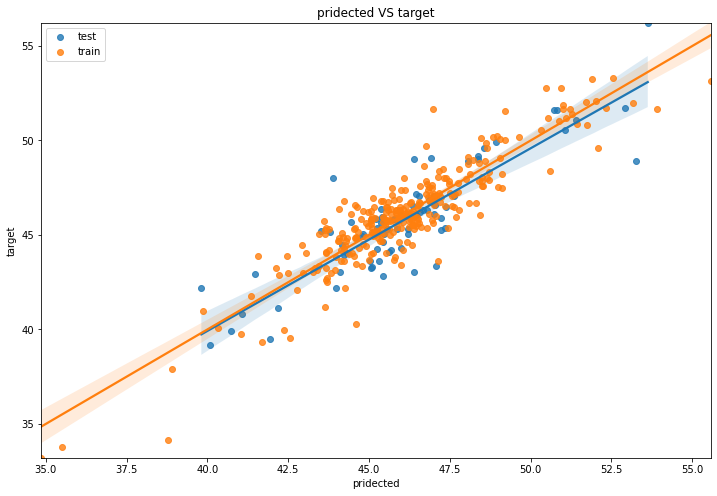

In [26]:
prtest=pcr.predict(x_test).reshape(len(y_test),1)
prtest=[i[0] for i in prtest]
prtrain=pcr.predict(x_train).reshape(len(y_train),1)
prtrain=[i[0] for i in prtrain]
sns.regplot(prtest,y_test,label="test")
sns.regplot(prtrain,y_train,label="train")
plt.legend(loc="upper left")
plt.xlabel("pridected")
plt.ylabel("target")
plt.xlim(min(min(prtrain),min(prtest)),max(max(prtrain),max(prtest)))
plt.ylim(min(min(y_train),min(y_test)),max(max(y_train),max(y_test)))
plt.title("pridected VS target")
plt.show()

C:\Users\ayoub\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ayoub\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


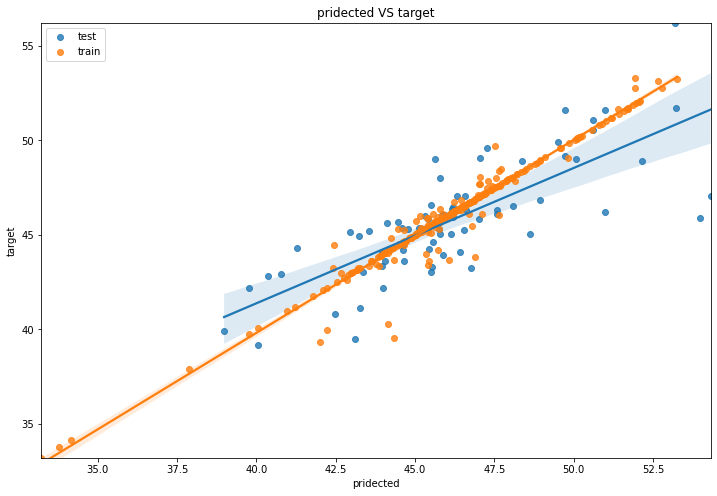

In [27]:
prtest=svr.predict(x_test).reshape(len(y_test),1)
prtest=[i[0] for i in prtest]
prtrain=svr.predict(x_train).reshape(len(y_train),1)
prtrain=[i[0] for i in prtrain]
sns.regplot(prtest,y_test,label="test")
sns.regplot(prtrain,y_train,label="train")
plt.legend(loc="upper left")
plt.xlabel("pridected")
plt.ylabel("target")
plt.xlim(min(min(prtrain),min(prtest)),max(max(prtrain),max(prtest)))
plt.ylim(min(min(y_train),min(y_test)),max(max(y_train),max(y_test)))
plt.title("pridected VS target")
plt.show()

C:\Users\ayoub\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ayoub\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


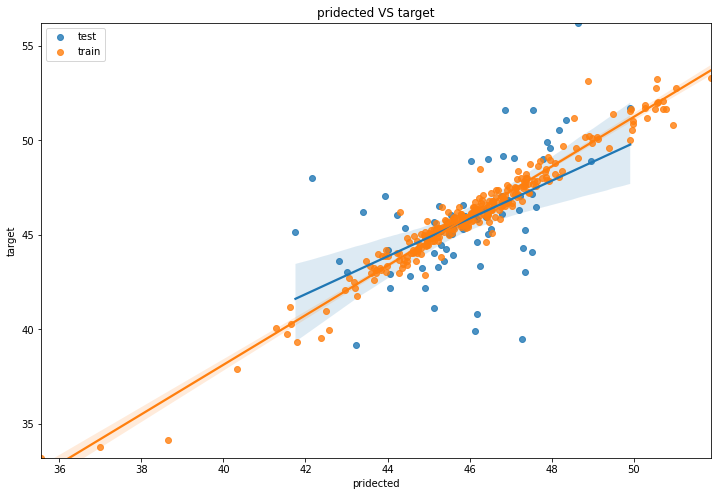

In [28]:
prtest=rf.predict(x_test).reshape(len(y_test),1)
prtest=[i[0] for i in prtest]
prtrain=rf.predict(x_train).reshape(len(y_train),1)
prtrain=[i[0] for i in prtrain]
sns.regplot(prtest,y_test,label="test")
sns.regplot(prtrain,y_train,label="train")
plt.legend(loc="upper left")
plt.xlabel("pridected")
plt.ylabel("target")
plt.xlim(min(min(prtrain),min(prtest)),max(max(prtrain),max(prtest)))
plt.ylim(min(min(y_train),min(y_test)),max(max(y_train),max(y_test)))
plt.title("pridected VS target")
plt.show()

C:\Users\ayoub\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ayoub\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


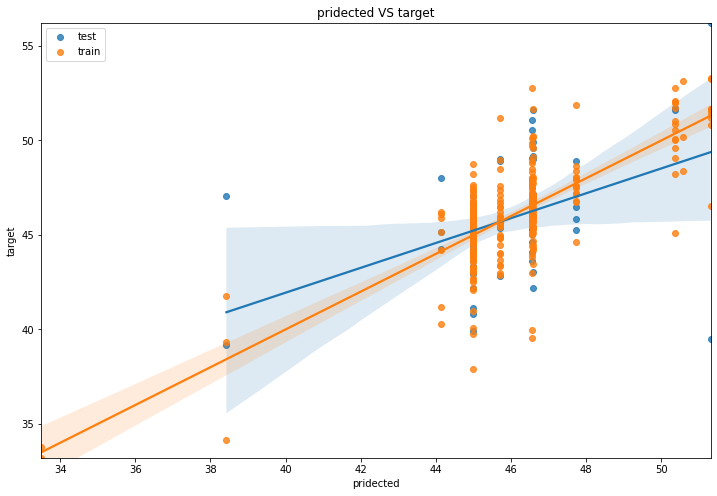

In [29]:
prtest=dt.predict(x_test).reshape(len(y_test),1)
prtest=[i[0] for i in prtest]
prtrain=dt.predict(x_train).reshape(len(y_train),1)
prtrain=[i[0] for i in prtrain]
sns.regplot(prtest,y_test,label="test")
sns.regplot(prtrain,y_train,label="train")
plt.legend(loc="upper left")
plt.xlabel("pridected")
plt.ylabel("target")
plt.xlim(min(min(prtrain),min(prtest)),max(max(prtrain),max(prtest)))
plt.ylim(min(min(y_train),min(y_test)),max(max(y_train),max(y_test)))
plt.title("pridected VS target")
plt.show()

C:\Users\ayoub\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ayoub\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


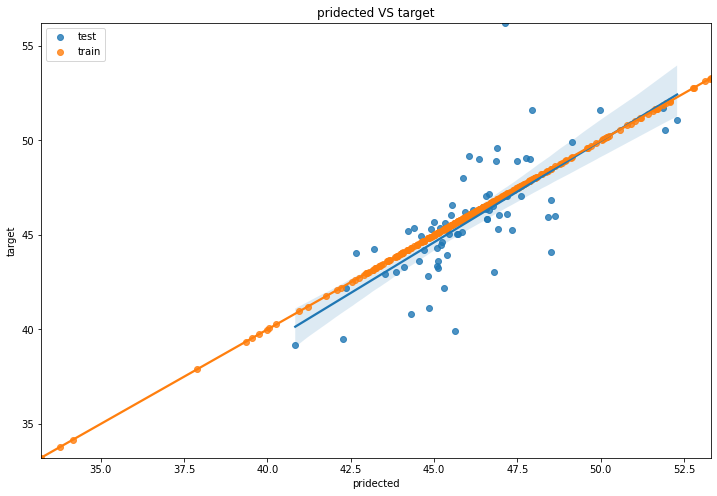

In [30]:
prtest=knn.predict(x_test).reshape(len(y_test),1)
prtest=[i[0] for i in prtest]
prtrain=knn.predict(x_train).reshape(len(y_train),1)
prtrain=[i[0] for i in prtrain]
sns.regplot(prtest,y_test,label="test")
sns.regplot(prtrain,y_train,label="train")
plt.legend(loc="upper left")
plt.xlabel("pridected")
plt.ylabel("target")
plt.xlim(min(min(prtrain),min(prtest)),max(max(prtrain),max(prtest)))
plt.ylim(min(min(y_train),min(y_test)),max(max(y_train),max(y_test)))
plt.title("pridected VS target")
plt.show()

C:\Users\ayoub\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ayoub\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


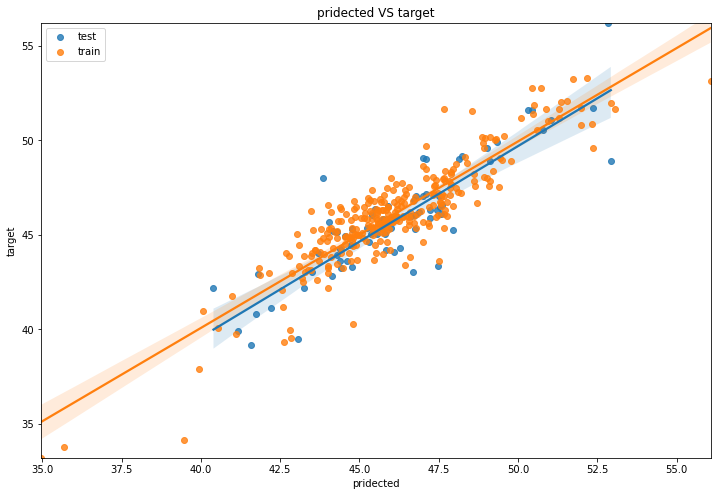

In [31]:
prtest=nnm.predict(x_test).reshape(len(y_test),1)
prtest=[i[0] for i in prtest]
prtrain=nnm.predict(x_train).reshape(len(y_train),1)
prtrain=[i[0] for i in prtrain]
sns.regplot(prtest,y_test,label="test")
sns.regplot(prtrain,y_train,label="train")
plt.legend(loc="upper left")
plt.xlabel("pridected")
plt.ylabel("target")
plt.xlim(min(min(prtrain),min(prtest)),max(max(prtrain),max(prtest)))
plt.ylim(min(min(y_train),min(y_test)),max(max(y_train),max(y_test)))
plt.title("pridected VS target")
plt.show()